<a href="https://colab.research.google.com/github/Lior-Baruch/Computational-geometry/blob/main/HW1_CG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from math import atan2

In [2]:
# plot hull (for testing and understanding)
def plot_hull(hull):
    points = hull.points
    plt.plot(points[:,0], points[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

def plot_points(points):
    plt.plot(points[:,0], points[:,1], 'o')

In [3]:
# Q.1.1 - Write a program that sorts a given set on n integers utilizing a function that computes the
#convex hull of a set of points in the plane.
def sort_using_convex_hull(int_arr):
    # Create a set of points using the integers as coordinates
    points = np.array([[number, number*number] for number in int_arr])

    # Compute the convex hull of the points
    hull = ConvexHull(points)

    # Sort the original set of numbers using the vertices of the convex hull
    sorted_numbers = [points[vertex, 0] for vertex in hull.vertices]
    min_index = np.argmin(sorted_numbers)
    sorted_numbers = np.roll(sorted_numbers, -min_index)
    return sorted_numbers

In [4]:
# Test Q.1.1
unsorted_arr = np.random.randint(10, size=10)
sorted_arr = sort_using_convex_hull(unsorted_arr)

print("unsorted_arr = {}".format(unsorted_arr))
print("sorted_arr = {}".format(sorted_arr))

unsorted_arr = [1 2 0 2 1 8 5 6 6 2]
sorted_arr = [0 1 2 5 6 8]


In [10]:
# Q.1.2.1 - Write a program that sorts a given set P of points into a counterclockwise circular order about an anchor
#point (o in the picture below) that is strictly inside the convex hull of P, e.g., the center of mass of the
#points (their average).

atan2_vec = np.vectorize(atan2)

# returns tuple of sorted counterclockwise points and anchor
def sort_counterclockwise_circular(points):
  # Convert the points to a numpy array
  points = np.array(points)

  # Compute the mean of the x and y coordinates of the points
  x_mean = np.mean(points[:, 0])
  y_mean = np.mean(points[:, 1])
  anchor = (x_mean, y_mean)

  # Sort the points by their polar angle with the (x_mean, y_mean), in
  # counterclockwise order
  sorted_counterclockwise = np.array(sorted(points, key=lambda point: atan2(point[1] - y_mean, point[0] - x_mean), reverse=True))
  return (sorted_counterclockwise, anchor)

anchor = (42.4, 62.4)


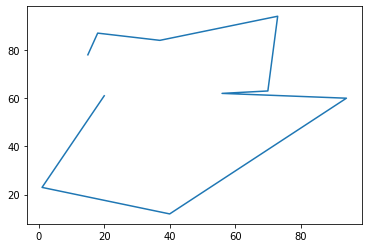

In [11]:
# Test Q.1.2.1

points_test = np.random.randint(low = 0, high = 100, size = (10,2))
points_sorted_circular_test, anchor = sort_counterclockwise_circular(points_test)

#print(points_test)
#print(points_sorted_circular_test)
#plot_points(points_test)
#plot_points(points_sorted_circular_test)
#plt.plot(points_test[:,0], points_test[:,1])
print("anchor = {}".format(anchor))
plt.plot(points_sorted_circular_test[:,0], points_sorted_circular_test[:,1])


**Q.1.3**
One possible algorithm for computing the convex hull of a set of convex polygons in time O(Nlog(k)) is the divide and conquer algorithm. This algorithm works by recursively dividing the set of polygons into smaller sets and computing the convex hull of each set, until there is only one polygon left in each set. Then, the convex hulls of the individual sets are combined to obtain the final result.

To achieve a time complexity of O(Nlog(k)), we can use a binary tree structure to divide the polygons into smaller sets at each step of the recursion. This allows us to split the polygons into two halves at each step, which results in a logarithmic number of recursive steps. Then, we can use a linear-time algorithm, such as the gift wrapping algorithm, to compute the convex hull of each set of polygons at each recursive step.

Here is a pseudocode outline of the algorithm:
function convex_hull(polygons):
  # base case: return the convex hull of a single polygon
  if polygons.length == 1:
    return compute_convex_hull(polygons[0])

  # divide the polygons into two sets using a binary tree structure
  left_polygons = polygons[0...polygons.length/2]
  right_polygons = polygons[polygons.length/2...polygons.length]

  # compute the convex hulls of the two sets of polygons recursively
  left_hull = convex_hull(left_polygons)
  right_hull = convex_hull(right_polygons)

  # combine the convex hulls of the two sets to obtain the final result
  return combine_convex_hulls(left_hull, right_hull)


This algorithm has a time complexity of O(Nlog(k)), where N is the total number of vertices in the input polygons and k is the number of polygons. This is because each recursive step divides the polygons into two smaller sets and then computes the convex hull of each set in linear time, resulting in a logarithmic number of recursive steps. Additionally, the combine_convex_hulls function can be implemented to run in linear time

To combine the convex hulls of two sets of polygons in linear time, we can use the gift wrapping algorithm (also known as Jarvis march) to compute the convex hull of the union of the two sets. This algorithm works by iteratively selecting points that are part of the convex hull, starting from the leftmost point. At each step, it selects the point that is the farthest to the right in the direction of the current hull edge. The algorithm continues until it reaches the starting point, at which point the convex hull is complete.